# Classification_Task_Flower_ Classification_manual_Split_BASE_Line

## Importing Data

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Train_dataGen = ImageDataGenerator(rescale=1)
Test_dataGen =ImageDataGenerator(rescale=1)

## CNN Model

In [3]:
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dense,Dropout 
from keras.models import Sequential

In [4]:
model=Sequential()

In [5]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(5,activation='softmax'))

In [6]:
train_itt =Train_dataGen.flow_from_directory('D:\\DATA Science\\DEEP LEARNING\\CNN\Flower_Classification\\DataSet\\Flower_by_Split_folder\\train',
                                           batch_size=64,target_size=(100,100))

test_itt = Test_dataGen.flow_from_directory('D:\\DATA Science\\DEEP LEARNING\\CNN\Flower_Classification\\DataSet\\Flower_by_Split_folder\\test',
                                           batch_size=64,target_size=(100,100))

Found 3451 images belonging to 5 classes.
Found 498 images belonging to 5 classes.


In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
model.fit(train_itt,validation_data=test_itt,epochs=8)

Epoch 1/8
54/54 [==============================] - 107s 2s/step - loss: 23.7398 - accuracy: 0.3240 - val_loss: 1.4325 - val_accuracy: 0.3815
Epoch 2/8
54/54 [==============================] - 107s 2s/step - loss: 1.3113 - accuracy: 0.4677 - val_loss: 1.3271 - val_accuracy: 0.4679
Epoch 3/8
54/54 [==============================] - 103s 2s/step - loss: 1.1476 - accuracy: 0.5430 - val_loss: 1.3363 - val_accuracy: 0.4880
Epoch 4/8
54/54 [==============================] - 105s 2s/step - loss: 1.0240 - accuracy: 0.6045 - val_loss: 1.2826 - val_accuracy: 0.5602
Epoch 5/8
54/54 [==============================] - 113s 2s/step - loss: 0.7731 - accuracy: 0.7068 - val_loss: 1.3302 - val_accuracy: 0.5462
Epoch 6/8
54/54 [==============================] - 90s 2s/step - loss: 0.5785 - accuracy: 0.7922 - val_loss: 1.3531 - val_accuracy: 0.5622
Epoch 7/8
54/54 [==============================] - 100s 2s/step - loss: 0.4157 - accuracy: 0.8519 - val_loss: 1.5528 - val_accuracy: 0.5643
Epoch 8/8
54/54 [===

In [9]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

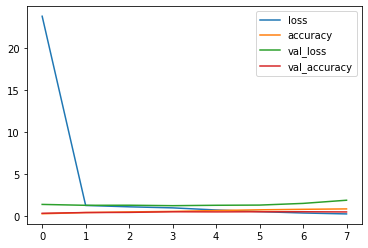

In [10]:
losses.plot()

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score

In [12]:
predictions = model.evaluate(test_itt)

8/8 [==============================] - 4s 482ms/step - loss: 1.9283 - accuracy: 0.5402


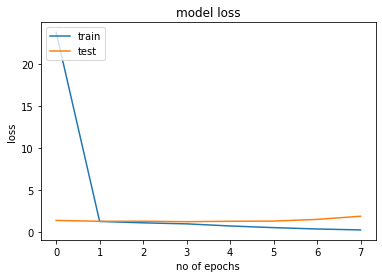

In [13]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

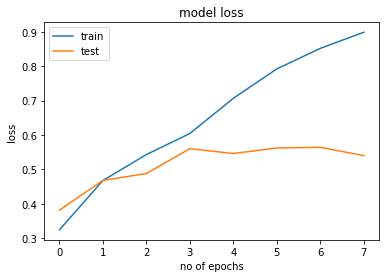

In [14]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [15]:
class_label= test_itt.class_indices
class_label

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}